In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

# Define the path to the folder containing the compressed CSV files
path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"

# Get all compressed CSV files in the folder and sort them by name
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz")))

# Initialize figure and subplots
fig, axes = plt.subplots(16, 4, figsize=(20, 40))

# Iterate over each file and plot angles in the corresponding subplot
for i, file in enumerate(all_files):
    # Read data from compressed CSV file
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    if not df.empty:
        zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
        ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
        xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
        dx = xs.diff().interpolate(method='bfill')
        dy = ys.diff().interpolate(method='bfill')
        dz = zs.diff().interpolate(method='bfill')

        df["dx"] = dx
        df["dy"] = dy
        df["dz"] = dz

        angle_wrappeds = np.arctan2(dy, dx)

        # Angle unwrapping
        last = 0
        angles = []
        for j in range(len(dx)):
            phi = np.arctan2(dy[j], dx[j])
            while phi < last - np.pi:
                phi += 2 * np.pi
            while phi > last + np.pi:
                phi -= 2 * np.pi
            last = phi
            angles.append(phi)

        angles = np.array(angles)

        # Calculate the subplot indices
        row = i % 16  # Calculate the row index
        col = i // 16  # Calculate the column index

        # Plot angles in the corresponding subplot
        axes[row, col].plot(angles)
        axes[row, col].set_title(os.path.basename(file))  # Set the subplot title as the filename
    else:
        # If df is empty, leave the subplot empty
        axes[i % 16, i // 16].axis('off')

# Adjust subplot spacing and labels
plt.tight_layout()
plt.show()


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

# Define the path to the folder containing the compressed CSV files
path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
# Get all compressed CSV files in the folder and sort them by name
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz")))

# Create a dictionary to store fish IDs and their corresponding subplot indices
fish_ids = {}

# Assign subplot indices to fish IDs
for i, file in enumerate(all_files):
    # Get the fish ID from the first two letters of the filename
    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_ids:
        fish_ids[fish_id] = len(fish_ids)  # Assign a new index to the fish ID

# Create a 16x4 grid of subplots
fig, axes = plt.subplots(16, 4, figsize=(20, 40))

# Iterate over each file and plot angles in the corresponding subplot
for i, file in enumerate(all_files):
    # Read data from compressed CSV file
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    angle_wrappeds = np.arctan2(dy, dx)

    # Angle unwrapping
    last = 0
    angles = []
    for j in range(len(dx)):
        phi = np.arctan2(dy[j], dx[j])
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    angles = np.array(angles)

    # Get the fish ID from the first two letters of the filename
    fish_id = os.path.basename(file)[:2]

    if fish_id in fish_ids:
        # Get the subplot indices for the fish ID
        row = fish_ids[fish_id] // 4  # Calculate the row index
        col = fish_ids[fish_id] % 4  # Calculate the column index

        # Plot angles in the corresponding subplot
        axes[row, col].plot(angles)
        axes[row, col].set_title(os.path.basename(file))  # Set the subplot title as the filename

# Remove empty subplots
for i in range(16):
    for j in range(4):
        if not any(axes[i, j].get_lines()):
            fig.delaxes(axes[i, j])

# Adjust subplot spacing and labels
plt.tight_layout()
plt.show()


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz")))

fish_data = {}

for i, file in enumerate(all_files):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    last = 0
    angles = []
    for j in range(len(dx)):
        phi = np.arctan2(dy[j], dx[j])
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_data:
        fish_data[fish_id] = []

    fish_data[fish_id].append(angles)

fig, axes = plt.subplots(len(fish_data), 1, figsize=(20, len(fish_data)*2.5))

for i, (fish_id, trials) in enumerate(fish_data.items()):
    for j, trial in enumerate(trials):
        axes[i].plot(trial)
        if j < len(trials) - 1:  # Avoids adding a vertical line at the end of the last trial
            axes[i].axvline(x=len(trial), linestyle='--', color='red')  # Adds a vertical line at the end of the trial

    axes[i].set_title(fish_id)

plt.tight_layout()
plt.show()


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz")))  # Read only first 8 files

fish_data = {}

for file in tqdm(all_files, desc="Processing files"):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    last = 0
    angles = []
    for j in range(len(dx)):
        phi = np.arctan2(dy[j], dx[j])
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_data:
        fish_data[fish_id] = []

    fish_data[fish_id].append(angles)

fig, axes = plt.subplots(len(fish_data), 1, figsize=(20, len(fish_data)*2.5))

for i, (fish_id, trials) in enumerate(fish_data.items()):
    cumulative_angles = np.concatenate(trials)  # Concatenate all angle lists into one
    axes[i].plot(cumulative_angles)
    trial_lengths = np.cumsum([len(trial) for trial in trials])
    for trial_length in trial_lengths[:-1]:  # Avoids adding a vertical line at the end of the last trial
        axes[i].axvline(x=trial_length, linestyle='--', color='red')  # Adds a vertical line at the end of each trial

    axes[i].axvline(x=0, linestyle='--', color='red')  # Adds a vertical line at the beginning of the first trial
    axes[i].set_title(fish_id)
    axes[i].set_ylim([-1000, 3000])  # Set y-axis limits

plt.tight_layout()
plt.show()



Processing files: 100%|██████████| 59/59 [09:55<00:00, 10.10s/it]


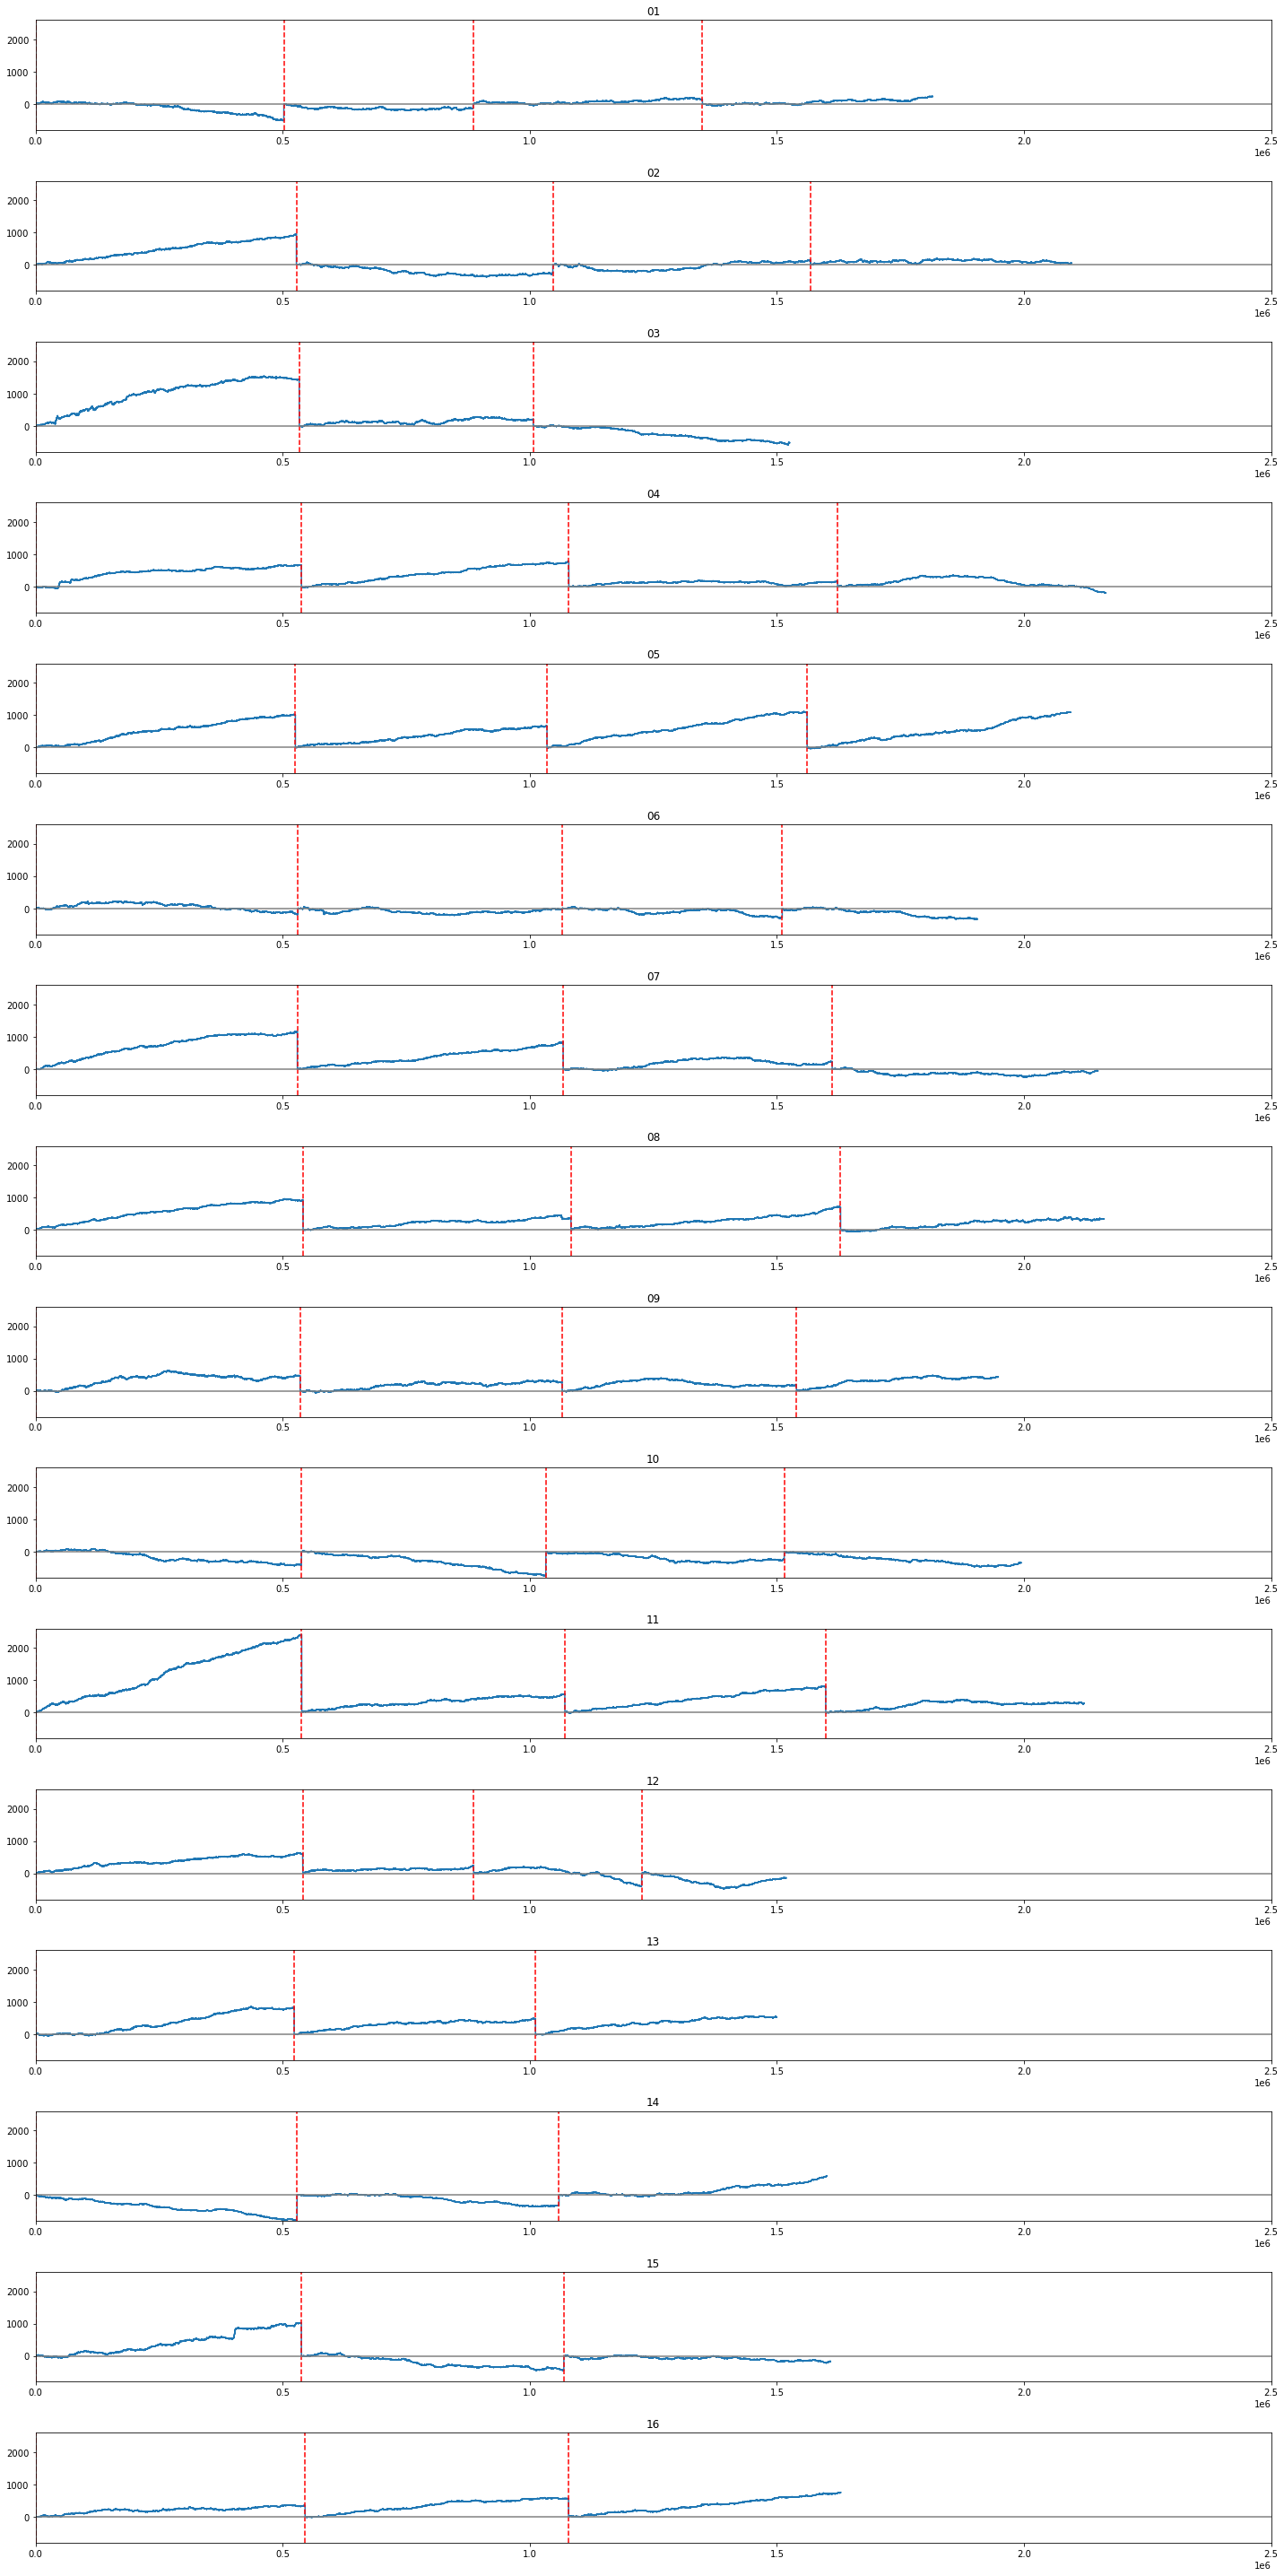

In [2]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz"))) 

fish_data = {}

for file in tqdm(all_files, desc="Processing files"):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    last = 0
    angles = []
    for j in range(len(dx)):
        phi = np.arctan2(dy[j], dx[j])
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_data:
        fish_data[fish_id] = []

    fish_data[fish_id].append(angles)

fig, axes = plt.subplots(len(fish_data), 1, figsize=(20, len(fish_data)*2.5))

for i, (fish_id, trials) in enumerate(fish_data.items()):
    cumulative_angles = np.concatenate(trials)  # Concatenate all angle lists into one
    axes[i].plot(cumulative_angles)
    trial_lengths = np.cumsum([len(trial) for trial in trials])
    for trial_length in trial_lengths[:-1]:  # Avoids adding a vertical line at the end of the last trial
        axes[i].axvline(x=trial_length, linestyle='--', color='red')  # Adds a vertical line at the end of each trial

    axes[i].axvline(x=0, linestyle='--', color='red')  # Adds a vertical line at the beginning of the first trial
    axes[i].axhline(0, color='grey')  # Adds a horizontal line at y=0
    axes[i].set_title(fish_id)
    axes[i].set_ylim([-800, 2600])  # Set y-axis limits
    axes[i].set_xlim([0, 2.5e6])  # Set x-axis limits

plt.tight_layout()
plt.show()


Processing files: 100%|██████████| 59/59 [01:14<00:00,  1.26s/it]


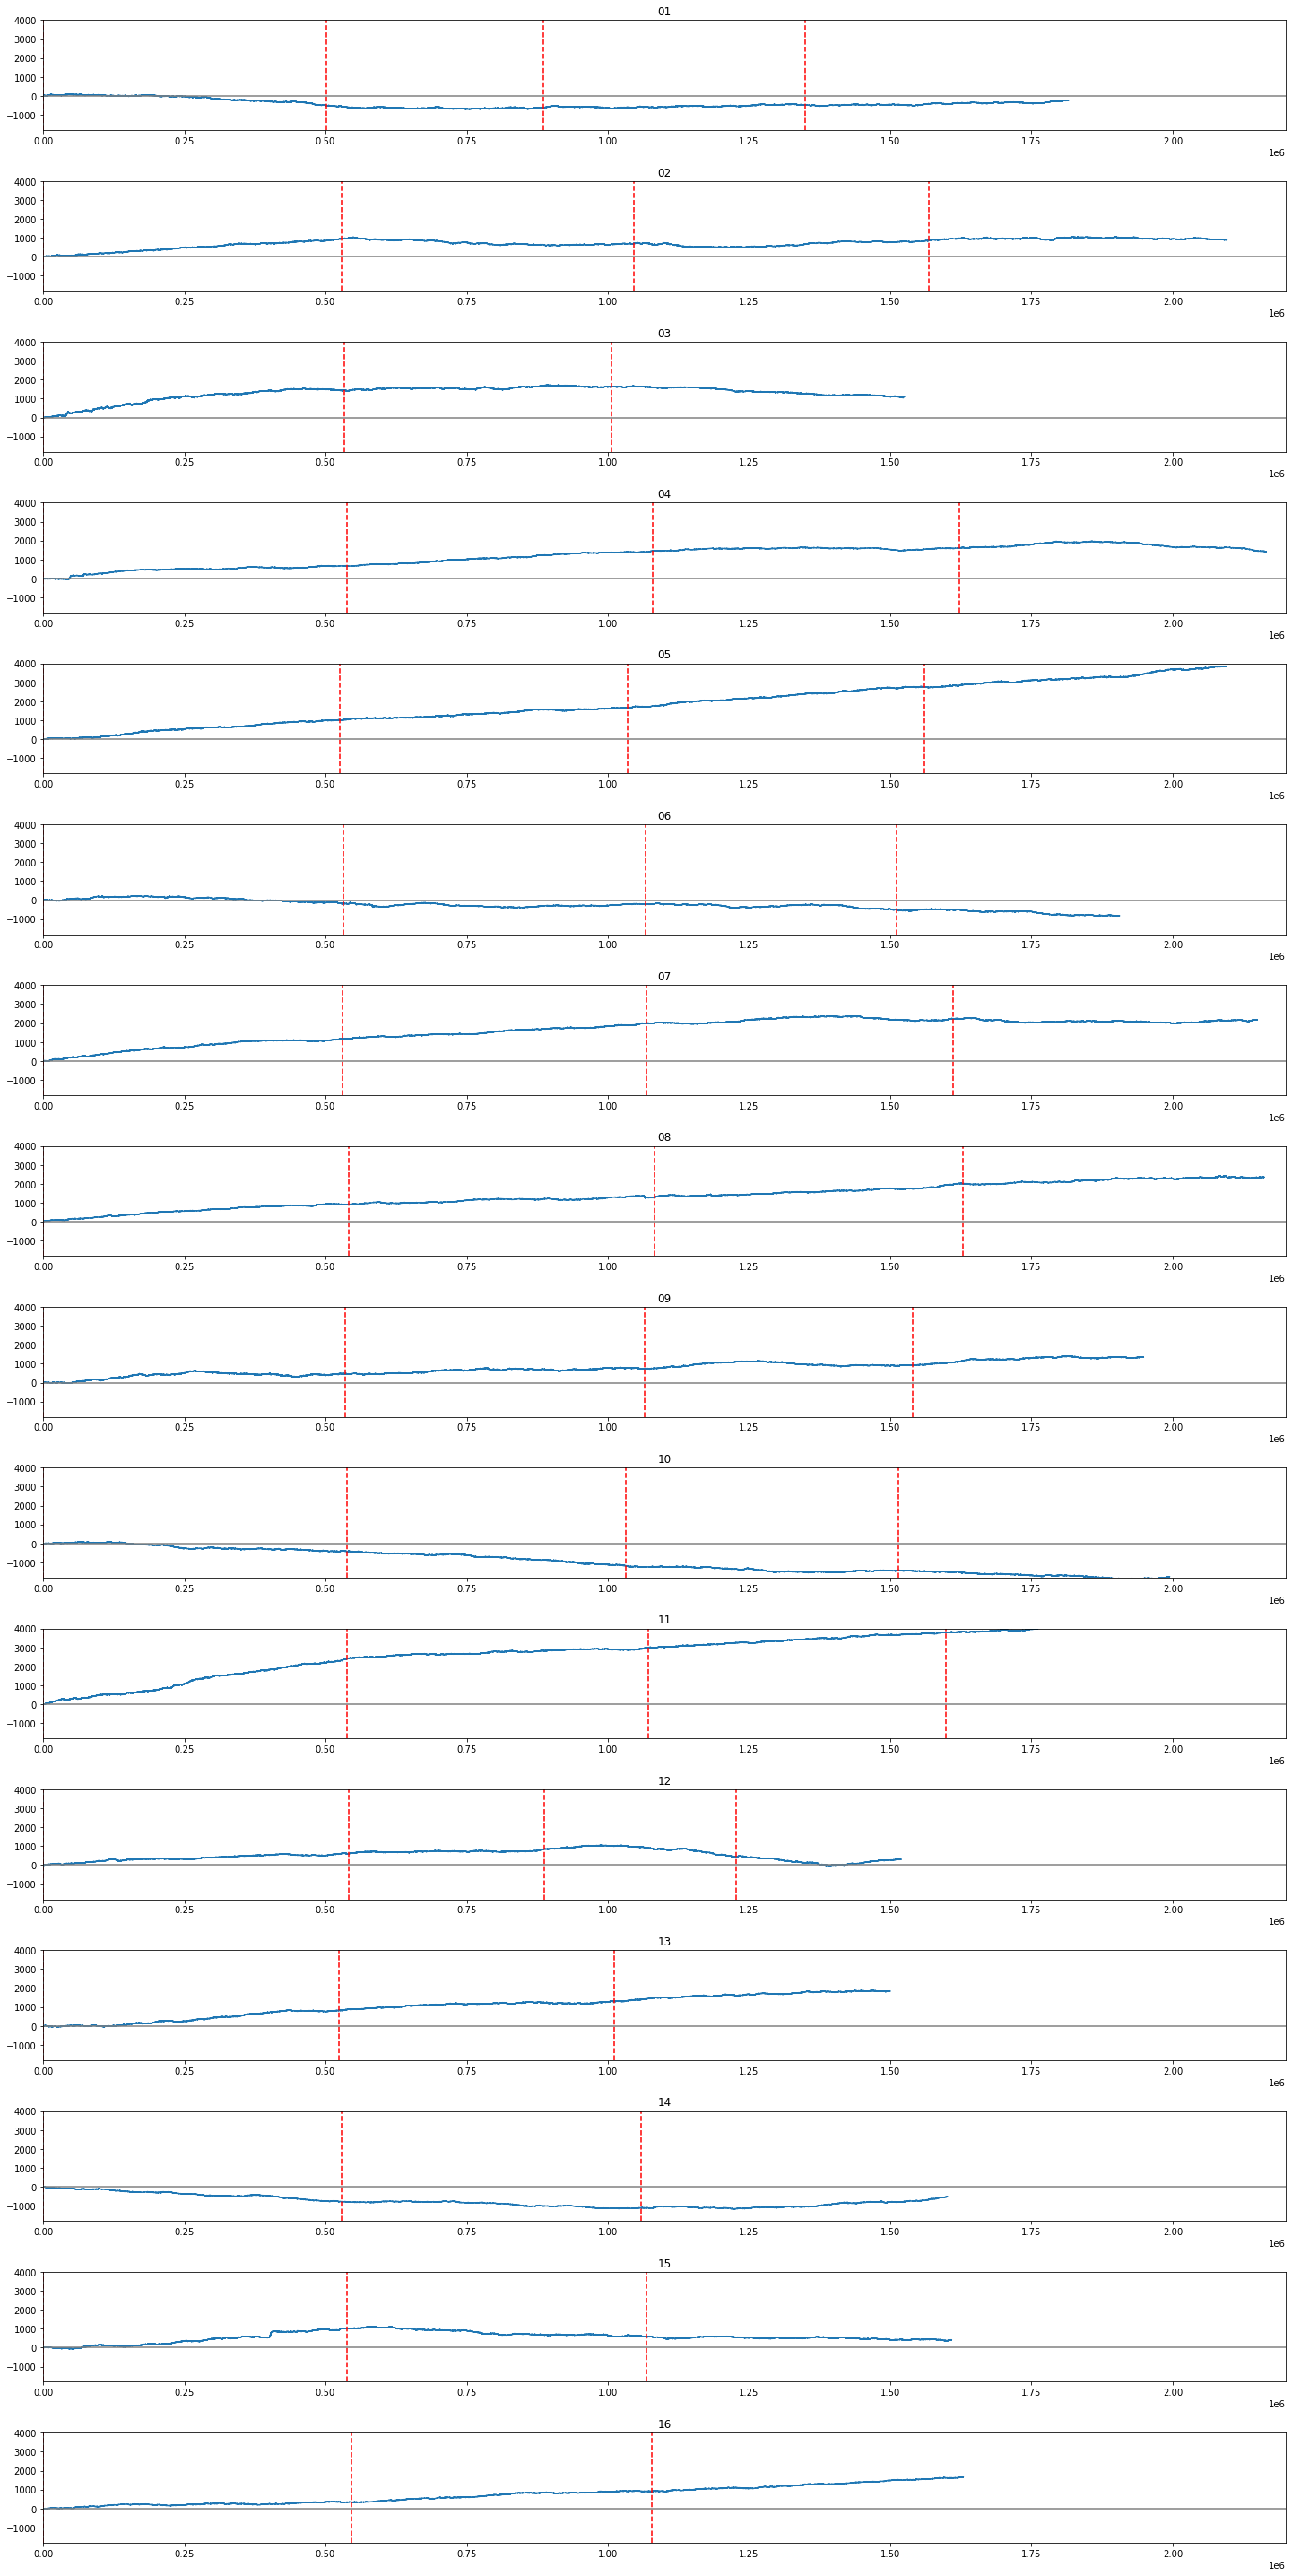

In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz"))) 

fish_data = {}

# First pass to read and collate all the data by fish
for file in tqdm(all_files, desc="Processing files"):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_data:
        fish_data[fish_id] = {'df': [], 'files': []}

    fish_data[fish_id]['df'].append(df)
    fish_data[fish_id]['files'].append(file)

# Second pass to calculate rolling mean and angles
for fish_id, data in fish_data.items():
    df = pd.concat(data['df'])

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    angle_wrapped = np.arctan2(dy, dx)
    
    last = 0
    angles = []
    for phi in angle_wrapped:
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    data['angles'] = angles

fig, axes = plt.subplots(len(fish_data), 1, figsize=(20, len(fish_data)*2.5))

for i, (fish_id, data) in enumerate(fish_data.items()):
    axes[i].plot(data['angles'])
    df_lengths = [len(df) for df in data['df']]
    trial_lengths = np.cumsum(df_lengths)
    for trial_length in trial_lengths[:-1]:  # Avoids adding a vertical line at the end of the last trial
        axes[i].axvline(x=trial_length, linestyle='--', color='red')  # Adds a vertical line at the end of each trial

    axes[i].axvline(x=0, linestyle='--', color='red')  # Adds a vertical line at the beginning of the first trial
    axes[i].axhline(0, color='grey')  # Adds a horizontal line at y=0
    axes[i].set_title(fish_id)
    axes[i].set_xlim([0, 2.2e6])  # Set x-axis limits
    axes[i].set_ylim([-1800, 4000])  # Set y-axis limits

plt.tight_layout()
plt.show()


Processing files: 100%|██████████| 59/59 [01:17<00:00,  1.32s/it]


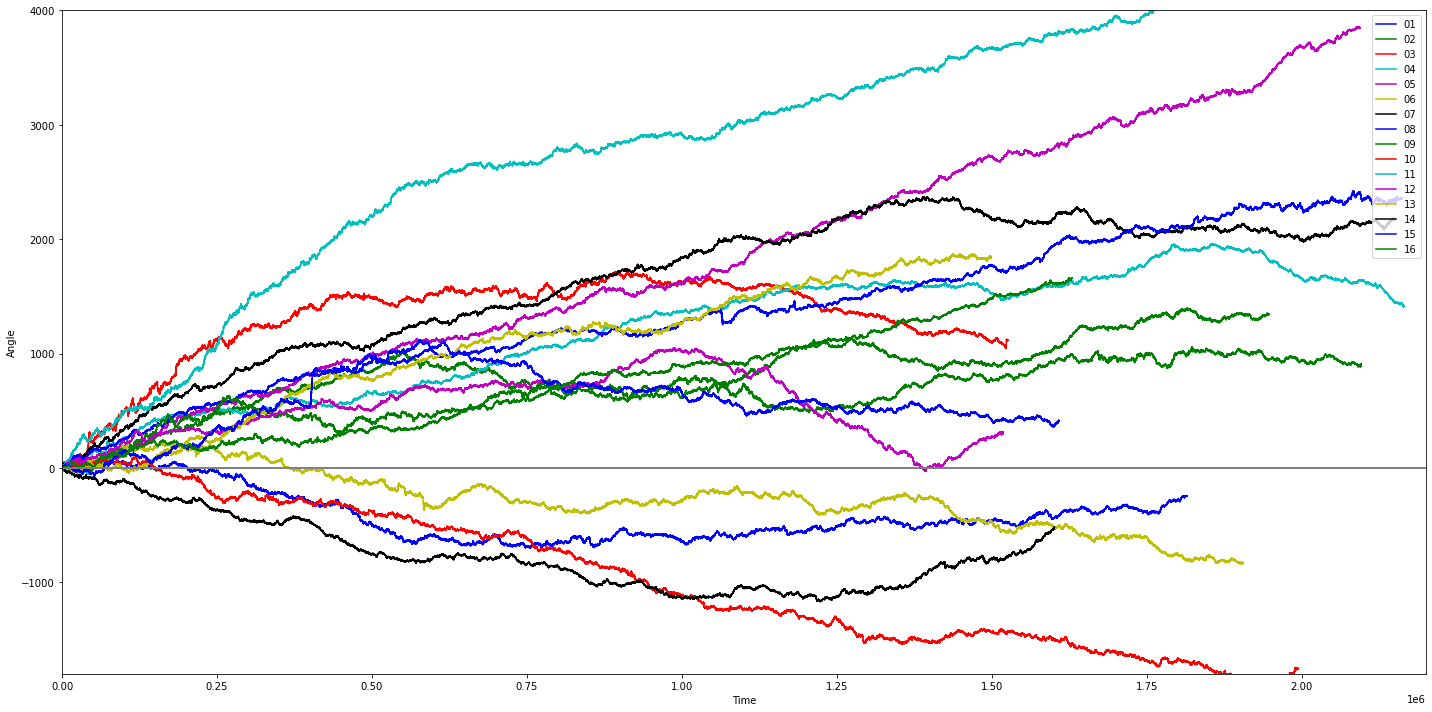

In [4]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz"))) 

fish_data = {}

# First pass to read and collate all the data by fish
for file in tqdm(all_files, desc="Processing files"):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_data:
        fish_data[fish_id] = {'df': [], 'files': []}

    fish_data[fish_id]['df'].append(df)
    fish_data[fish_id]['files'].append(file)

# Second pass to calculate rolling mean and angles
for fish_id, data in fish_data.items():
    df = pd.concat(data['df'])

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    angle_wrapped = np.arctan2(dy, dx)
    
    last = 0
    angles = []
    for phi in angle_wrapped:
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    data['angles'] = angles

fig, ax = plt.subplots(figsize=(20, 10))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if you have more fish

for i, (fish_id, data) in enumerate(fish_data.items()):
    ax.plot(data['angles'], color=colors[i % len(colors)], label=fish_id)  # Use color and label to distinguish different fish in the plot
    ax.axhline(0, color='grey')  # Adds a horizontal line at y=0
    ax.set_xlim([0, 2.2e6])  # Set x-axis limits
    ax.set_ylim([-1800, 4000])  # Set y-axis limits

ax.set_xlabel('Time')  # Set x-axis label
ax.set_ylabel('Angle')  # Set y-axis label
ax.legend(loc='upper right')  # Add legend

plt.tight_layout()
plt.show()


Processing files: 100%|██████████| 59/59 [01:15<00:00,  1.29s/it]


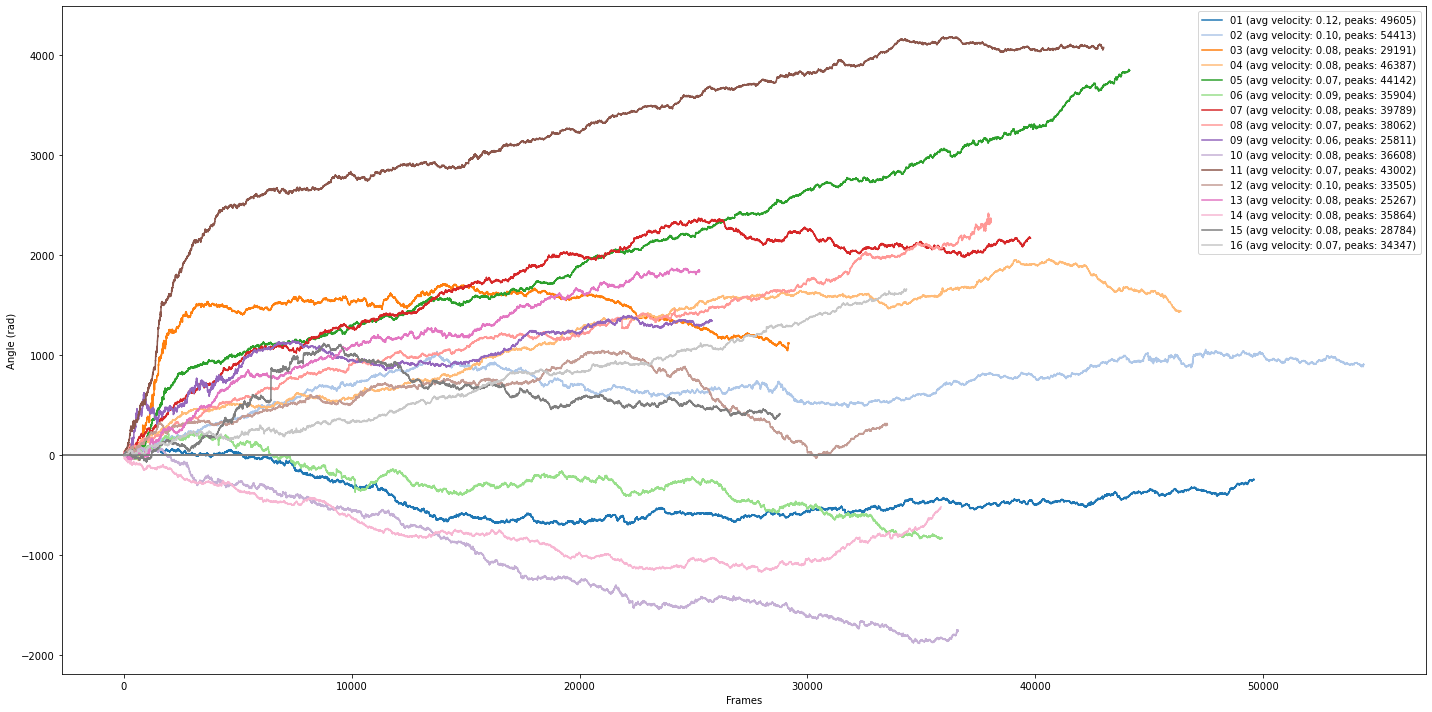

In [7]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gzip
from tqdm import tqdm
from scipy.signal import find_peaks

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz"))) 

fish_data = {}

# First pass to read and collate all the data by fish
for file in tqdm(all_files, desc="Processing files"):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_data:
        fish_data[fish_id] = {'df': [], 'files': []}

    fish_data[fish_id]['df'].append(df)
    fish_data[fish_id]['files'].append(file)

# Second pass to calculate rolling mean, angles and velocity
for fish_id, data in fish_data.items():
    df = pd.concat(data['df'])

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    angle_wrapped = np.arctan2(dy, dx)
    
    last = 0
    angles = []
    for phi in angle_wrapped:
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    fHz = 100
    dt = 1 / fHz
    velocity = np.sqrt(df["dx"] ** 2 + df["dy"] ** 2 + df["dz"] ** 2) / dt
    avg_velocity = velocity.mean()  # Compute average velocity for each fish
    data['avg_velocity'] = avg_velocity

    height = (0.1, 0.5)
    frames_btw_2bouts = round(fHz / 10)
    bout_width = round(fHz / 100)
    prominence = 0.05
    peaks, _ = find_peaks(velocity, height=height, distance=frames_btw_2bouts, width=bout_width, prominence=prominence)
    angles_at_peaks = [angles[i] for i in peaks]
    data['angles_at_peaks'] = angles_at_peaks

def plot_angle_peaks(fish_id, angles, avg_velocity, num_peaks, color):
    plt.plot(angles, color=color, label=f"{fish_id} (avg velocity: {avg_velocity:.2f}, peaks: {num_peaks})")

fig, ax = plt.subplots(figsize=(20, 10))

num_colors = 20  # set this to the number of colors you need
colors = cm.get_cmap('tab20', num_colors) 

for i, (fish_id, data) in enumerate(fish_data.items()):
    plot_angle_peaks(fish_id, data['angles_at_peaks'], data['avg_velocity'], len(data['angles_at_peaks']), colors(i))
    ax.axhline(0, color='grey')  # Adds a horizontal line at y=0
    # ax.set_xlim([0, 2.2e6])  # Set x-axis limits
    # ax.set_ylim([-np.pi, np.pi])  # Set y-axis limits

ax.set_xlabel('Frames')  # Set x-axis label
ax.set_ylabel('Angle (rad)')  # Set y-axis label
ax.legend(loc='upper right')  # Add legend

plt.tight_layout()
plt.show()


Processing files: 100%|██████████| 59/59 [01:16<00:00,  1.30s/it]


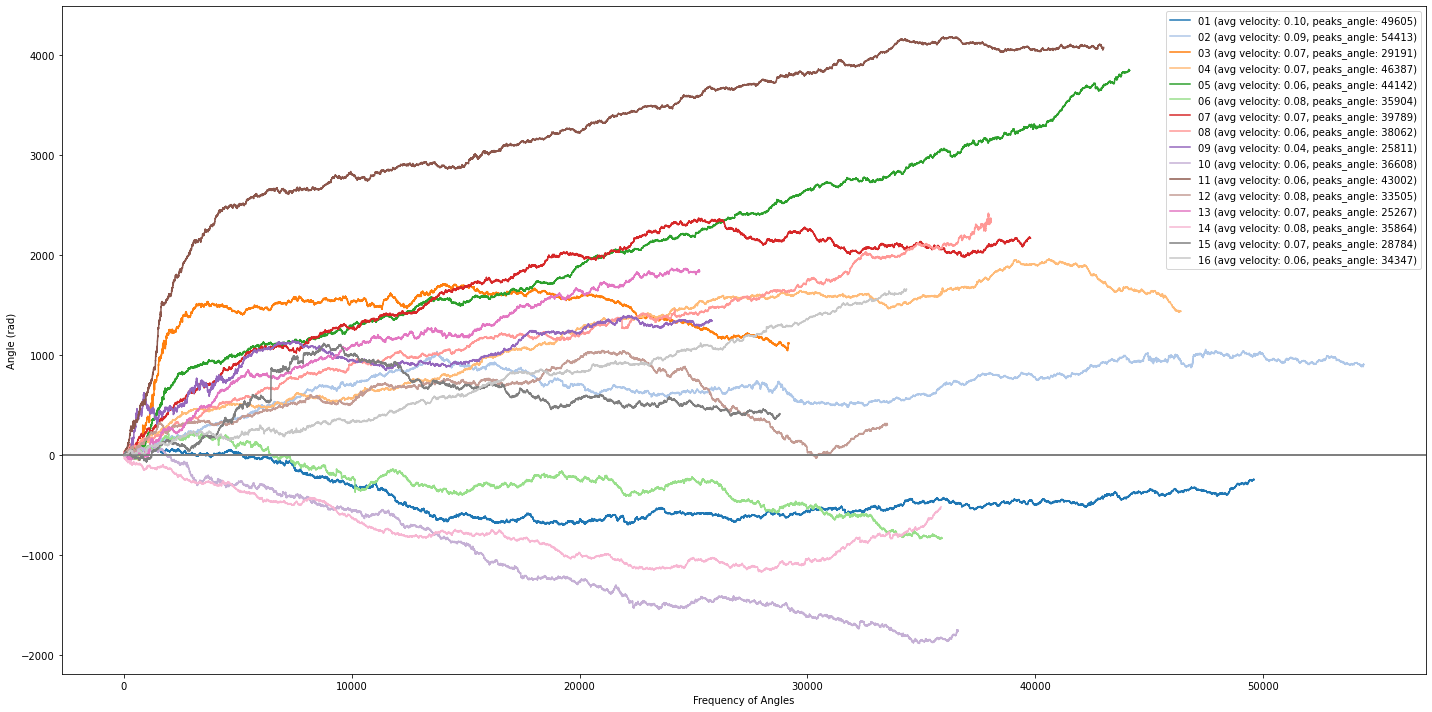

In [10]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gzip
from tqdm import tqdm
from scipy.signal import find_peaks

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz"))) 

fish_data = {}

# First pass to read and collate all the data by fish
for file in tqdm(all_files, desc="Processing files"):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    fish_id = os.path.basename(file)[:2]
    if fish_id not in fish_data:
        fish_data[fish_id] = {'df': [], 'files': []}

    fish_data[fish_id]['df'].append(df)
    fish_data[fish_id]['files'].append(file)

# Second pass to calculate rolling mean, angles and velocity
for fish_id, data in fish_data.items():
    df = pd.concat(data['df'])

    zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
    ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
    xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
    dx = xs.diff().interpolate(method='bfill')
    dy = ys.diff().interpolate(method='bfill')
    dz = zs.diff().interpolate(method='bfill')

    df["dx"] = dx
    df["dy"] = dy
    df["dz"] = dz

    angle_wrapped = np.arctan2(dy, dx)
    
    last = 0
    angles = []
    for phi in angle_wrapped:
        while phi < last - np.pi:
            phi += 2 * np.pi
        while phi > last + np.pi:
            phi -= 2 * np.pi
        last = phi
        angles.append(phi)

    fHz = 100
    dt = 1 / fHz
    velocity = np.sqrt(df["dx"] ** 2 + df["dy"] ** 2 + df["dz"] ** 2) / dt
    avg_velocity = velocity.median()# Compute average velocity for each fish
    data['avg_velocity'] = avg_velocity

    height = (0.1, 0.5)
    frames_btw_2bouts = round(fHz / 10)
    bout_width = round(fHz / 100)
    prominence = 0.05
    peaks, _ = find_peaks(velocity, height=height, distance=frames_btw_2bouts, width=bout_width, prominence=prominence)
    angles_at_peaks = [angles[i] for i in peaks]
    data['angles_at_peaks'] = angles_at_peaks

def plot_angle_peaks(fish_id, angles, avg_velocity, num_peaks, color):
    plt.plot(angles, color=color, label=f"{fish_id} (avg velocity: {avg_velocity:.2f}, peaks_angle: {num_peaks})")

fig, ax = plt.subplots(figsize=(20, 10))

num_colors = 20  # set this to the number of colors you need
colors = cm.get_cmap('tab20', num_colors) 

for i, (fish_id, data) in enumerate(fish_data.items()):
    plot_angle_peaks(fish_id, data['angles_at_peaks'], data['avg_velocity'], len(data['angles_at_peaks']), colors(i))
    ax.axhline(0, color='grey')  # Adds a horizontal line at y=0
    # ax.set_xlim([0, 2.2e6])  # Set x-axis limits
    # ax.set_ylim([-np.pi, np.pi])  # Set y-axis limits

ax.set_xlabel('Frequency of Angles')  # Set x-axis label
ax.set_ylabel('Angle (rad)')  # Set y-axis label
ax.legend(loc='upper right')  # Add legend

plt.tight_layout()
plt.show()


Processing files: 100%|██████████| 59/59 [01:16<00:00,  1.29s/it]


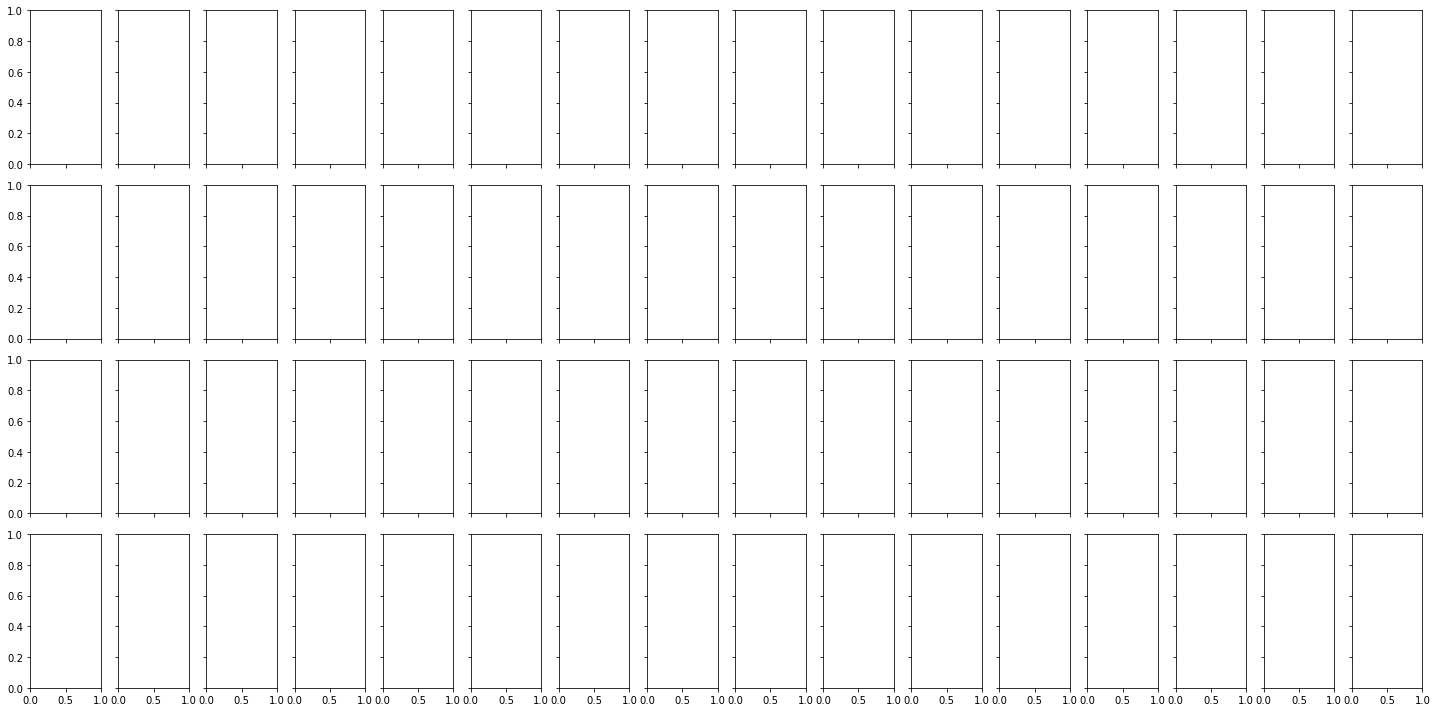

In [12]:
import os
import glob
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gzip
from tqdm import tqdm
from scipy.signal import find_peaks

desired_cols = ['fishz', 'fishy', 'fishx', 'realtime']

path = "/home/kkumari/PhD/fish-data/long-term-free-swim/"
all_files = sorted(glob.glob(os.path.join(path, "*.csv.gz"))) 

fish_data = {}

# First pass to read and collate all the data by fish
for file in tqdm(all_files, desc="Processing files"):
    with gzip.open(file, 'rb') as f:
        df = pd.read_csv(f, usecols=desired_cols)

    fish_id = os.path.basename(file)[:2]
    trial_id = os.path.basename(file)[3:5]
    if fish_id not in fish_data:
        fish_data[fish_id] = {}

    fish_data[fish_id][trial_id] = df

num_colors = 20  # set this to the number of colors you need
colors = cm.get_cmap('tab20', num_colors)
color_map = {fish_id: colors(i % num_colors) for i, fish_id in enumerate(sorted(fish_data.keys()))}

# Second pass to calculate rolling mean, angles and velocity
for fish_id in fish_data.keys():
    for trial_id, df in fish_data[fish_id].items(): 
        zs = df["fishx"].rolling(window=11, center=True).mean().interpolate(method="pad")
        ys = df["fishy"].rolling(window=11, center=True).mean().interpolate(method="pad")
        xs = df["fishz"].rolling(window=11, center=True).mean().interpolate(method="pad")
        dx = xs.diff().interpolate(method='bfill')
        dy = ys.diff().interpolate(method='bfill')
        dz = zs.diff().interpolate(method='bfill')

        df["dx"] = dx
        df["dy"] = dy
        df["dz"] = dz

        angle_wrapped = np.arctan2(dy, dx)
        
        last = 0
        angles = []
        for phi in angle_wrapped:
            while phi < last - np.pi:
                phi += 2 * np.pi
            while phi > last + np.pi:
                phi -= 2 * np.pi
            last = phi
            angles.append(phi)

        fHz = 100
        dt = 1 / fHz
        velocity = np.sqrt(df["dx"] ** 2 + df["dy"] ** 2 + df["dz"] ** 2) / dt
        avg_velocity = velocity.median()# Compute average velocity for each fish
        data['avg_velocity'] = avg_velocity

        height = (0.1, 0.5)
        frames_btw_2bouts = round(fHz / 10)
        bout_width = round(fHz / 100)
        prominence = 0.05
        peaks, _ = find_peaks(velocity, height=height, distance=frames_btw_2bouts, width=bout_width, prominence=prominence)
        angles_at_peaks = [angles[i] for i in peaks]
        data['angles_at_peaks'] = angles_at_peaks

fig, axs = plt.subplots(4, 16, figsize=(20, 10), sharex=True, sharey=True)

for i, fish_id in enumerate(sorted(fish_data.keys())):
    for j in range(16):
        trial_id = f'{j:02}'
        if trial_id in fish_data[fish_id]:
            data = fish_data[fish_id][trial_id]
            axs[i, j].plot(data['angles_at_peaks'], color=color_map[fish_id], label=f"{fish_id} (avg velocity: {data['avg_velocity']:.2f}, peaks_angle: {len(data['angles_at_peaks'])})")
            axs[i, j].axhline(0, color='grey')  # Adds a horizontal line at y=0
            axs[i, j].legend(loc='upper right')  # Add legend

plt.tight_layout()
plt.show()
